In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | parainen
Processing Record 2 of Set 13 | castro
Processing Record 3 of Set 13 | avarua
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | samusu
City not found. Skipping...
Processing Record 6 of Set 13 | george
Processing Record 7 of Set 13 | kangaba
Processing Record 8 of Set 13 | kurchum
Processing Record 9 of Set 13 | maraba
Processing Record 10 of Set 13 | bilma
Processing Record 11 of Set 13 | canberra
Processing Record 12 of Set 13 | tasiilaq
Processing Record 13 of Set 13 | khatanga
Processing Record 14 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 13 | serenje
Processing Record 16 of Set 13 | sisimiut
Processing Record 17 of Set 13 | georgetown
Processing Record 18 of Set 13 | hobart
Processing Record 19 of Set 13 | morristown
Processing Record 20 of Set 13 | monrovia
Processing Record 21 of Set 13 | arraial do cabo
Processing Recor

Processing Record 34 of Set 16 | yar-sale
Processing Record 35 of Set 16 | lasa
Processing Record 36 of Set 16 | paamiut
Processing Record 37 of Set 16 | sunyani
Processing Record 38 of Set 16 | greencastle
Processing Record 39 of Set 16 | zheleznodorozhnyy
Processing Record 40 of Set 16 | daitari
Processing Record 41 of Set 16 | saint george
Processing Record 42 of Set 16 | xiongzhou
Processing Record 43 of Set 16 | pacific grove
Processing Record 44 of Set 16 | tongliao
Processing Record 45 of Set 16 | lamar
Processing Record 46 of Set 16 | airai
Processing Record 47 of Set 16 | vilyuysk
Processing Record 48 of Set 16 | chagda
City not found. Skipping...
Processing Record 49 of Set 16 | kaitangata
Processing Record 50 of Set 16 | ostrovnoy
Processing Record 1 of Set 17 | yuksekova
Processing Record 2 of Set 17 | kununurra
Processing Record 3 of Set 17 | inzer
Processing Record 4 of Set 17 | deputatskiy
Processing Record 5 of Set 17 | faya
Processing Record 6 of Set 17 | nueva loja
Pr

Processing Record 20 of Set 20 | palmer
Processing Record 21 of Set 20 | concarneau
Processing Record 22 of Set 20 | otradnoye
Processing Record 23 of Set 20 | aguascalientes
Processing Record 24 of Set 20 | karratha
Processing Record 25 of Set 20 | tadine
Processing Record 26 of Set 20 | ponta do sol
Processing Record 27 of Set 20 | ahipara
Processing Record 28 of Set 20 | west wendover
Processing Record 29 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 20 | zhigansk
Processing Record 31 of Set 20 | naftah
City not found. Skipping...
Processing Record 32 of Set 20 | upernavik
Processing Record 33 of Set 20 | along
Processing Record 34 of Set 20 | atotonilquillo
Processing Record 35 of Set 20 | salalah
Processing Record 36 of Set 20 | turukhansk
Processing Record 37 of Set 20 | arroyo
Processing Record 38 of Set 20 | russell
Processing Record 39 of Set 20 | balkhash
Processing Record 40 of Set 20 | belmonte
Processing Record 41 of Set 20 | nushki
Processin

Processing Record 6 of Set 24 | alexandria
Processing Record 7 of Set 24 | queenstown
Processing Record 8 of Set 24 | hami
Processing Record 9 of Set 24 | nurota
Processing Record 10 of Set 24 | katsuura
Processing Record 11 of Set 24 | bima
Processing Record 12 of Set 24 | chimbote
Processing Record 13 of Set 24 | superior
Processing Record 14 of Set 24 | ustye
Processing Record 15 of Set 24 | piacabucu
Processing Record 16 of Set 24 | jabiru
City not found. Skipping...
Processing Record 17 of Set 24 | abaza
Processing Record 18 of Set 24 | aflu
City not found. Skipping...
Processing Record 19 of Set 24 | lazaro cardenas
Processing Record 20 of Set 24 | handwara
City not found. Skipping...
Processing Record 21 of Set 24 | gondanglegi
Processing Record 22 of Set 24 | galveston
Processing Record 23 of Set 24 | nuuk
Processing Record 24 of Set 24 | bontang
Processing Record 25 of Set 24 | novyy urgal
Processing Record 26 of Set 24 | sao joaquim
Processing Record 27 of Set 24 | beisfjord


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(11)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Parainen,60.3067,22.3010,68.45,91,71,8.43,FI,2022-07-23 04:54:42
1,Castro,-24.7911,-50.0119,55.83,68,32,2.39,BR,2022-07-23 04:54:42
2,Avarua,-21.2078,-159.7750,75.25,69,20,9.22,CK,2022-07-23 04:54:42
3,Rikitea,-23.1203,-134.9692,72.93,69,10,9.51,PF,2022-07-23 04:50:32
4,George,-33.9630,22.4617,51.35,93,75,11.50,ZA,2022-07-23 04:54:43
5,Kangaba,11.9333,-8.4167,71.89,92,97,2.13,ML,2022-07-23 04:54:45
6,Kurchum,48.5722,83.6542,80.15,27,67,12.21,KZ,2022-07-23 04:54:45
7,Maraba,-5.3686,-49.1178,71.78,100,0,0.00,BR,2022-07-23 04:51:09
8,Bilma,18.6853,12.9164,88.05,36,48,5.79,NE,2022-07-23 04:54:46
9,Canberra,-35.2835,149.1281,58.68,64,40,10.36,AU,2022-07-23 04:54:46


In [11]:
city_data_prep_df = city_data_df[["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_prep_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Parainen,FI,2022-07-23 04:54:42,60.3067,22.3010,68.45,91,71,8.43
1,Castro,BR,2022-07-23 04:54:42,-24.7911,-50.0119,55.83,68,32,2.39
2,Avarua,CK,2022-07-23 04:54:42,-21.2078,-159.7750,75.25,69,20,9.22
3,Rikitea,PF,2022-07-23 04:50:32,-23.1203,-134.9692,72.93,69,10,9.51
4,George,ZA,2022-07-23 04:54:43,-33.9630,22.4617,51.35,93,75,11.50
5,Kangaba,ML,2022-07-23 04:54:45,11.9333,-8.4167,71.89,92,97,2.13
6,Kurchum,KZ,2022-07-23 04:54:45,48.5722,83.6542,80.15,27,67,12.21
7,Maraba,BR,2022-07-23 04:51:09,-5.3686,-49.1178,71.78,100,0,0.00
8,Bilma,NE,2022-07-23 04:54:46,18.6853,12.9164,88.05,36,48,5.79
9,Canberra,AU,2022-07-23 04:54:46,-35.2835,149.1281,58.68,64,40,10.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_prep_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658554063.8735855

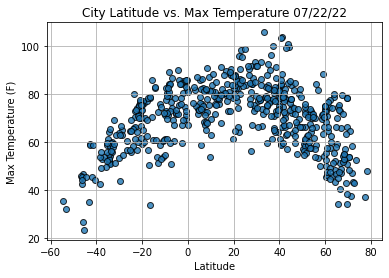

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


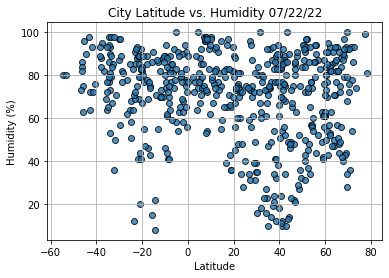

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

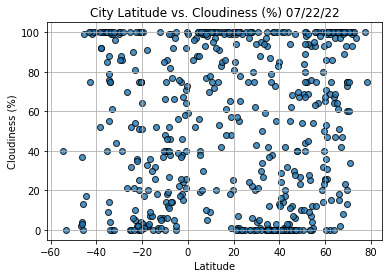

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

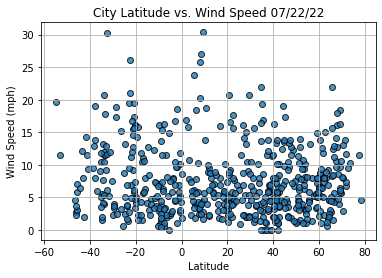

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate regression line values
    regress_values = x_values * slope + intercept

    # Get regression equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    plt.show()

In [31]:
city_data_prep_df.loc[(city_data_prep_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Parainen,FI,2022-07-23 04:54:42,60.3067,22.3010,68.45,91,71,8.43
5,Kangaba,ML,2022-07-23 04:54:45,11.9333,-8.4167,71.89,92,97,2.13
6,Kurchum,KZ,2022-07-23 04:54:45,48.5722,83.6542,80.15,27,67,12.21
8,Bilma,NE,2022-07-23 04:54:46,18.6853,12.9164,88.05,36,48,5.79
10,Tasiilaq,GL,2022-07-23 04:54:47,65.6145,-37.6368,34.25,82,61,8.23


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_prep_df.loc[(city_data_prep_df["Lat"] >= 0)]
southern_hemi_df = city_data_prep_df.loc[(city_data_prep_df["Lat"] < 0)]

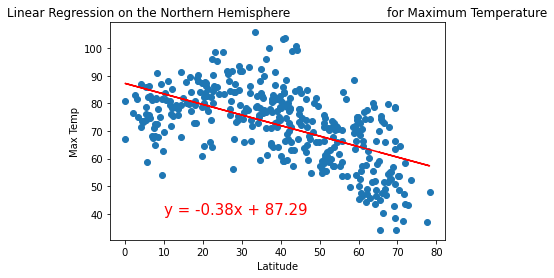

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

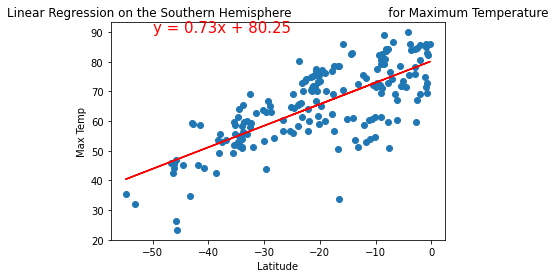

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

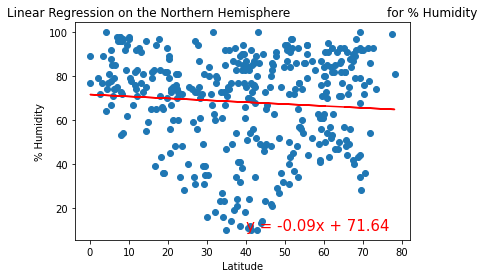

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

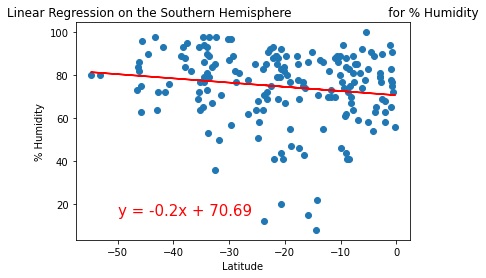

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

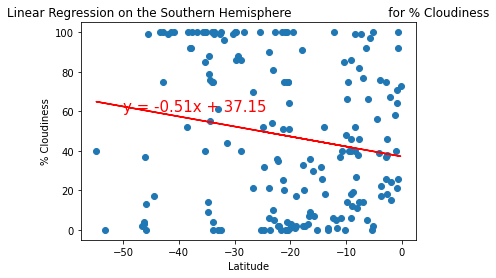

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

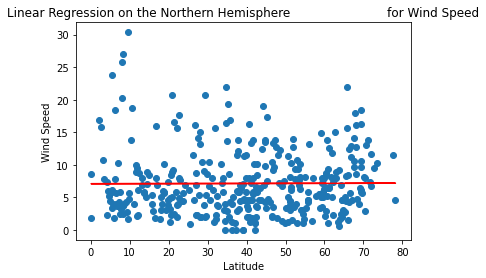

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

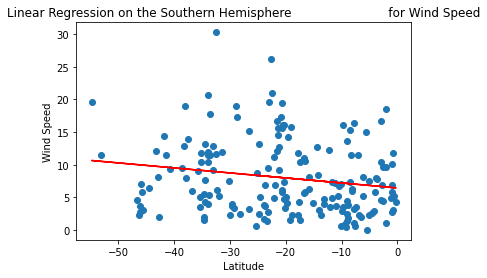

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))